<a href="https://colab.research.google.com/github/MAHABUB51/MiningApplicationsMLDL/blob/main/Water%20Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading  the Data

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/ML and DL/water_potability.csv')

# Display the first few rows of the dataset
print(data.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


#Exploring the Data

In [2]:
# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085 

#Handling Missing Values

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


#Normalizing the Data
Normalization scales the data to a standard range, typically 0 to 1.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


#Splitting the Data
We will split the data into features (X) and target (y), and then into training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data_scaled.drop('Potability', axis=1)
y = data_scaled['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Exploratory Data Analysis (EDA)
EDA helps us understand the data better through visualization and statistical analysis.

Visualizing the Data

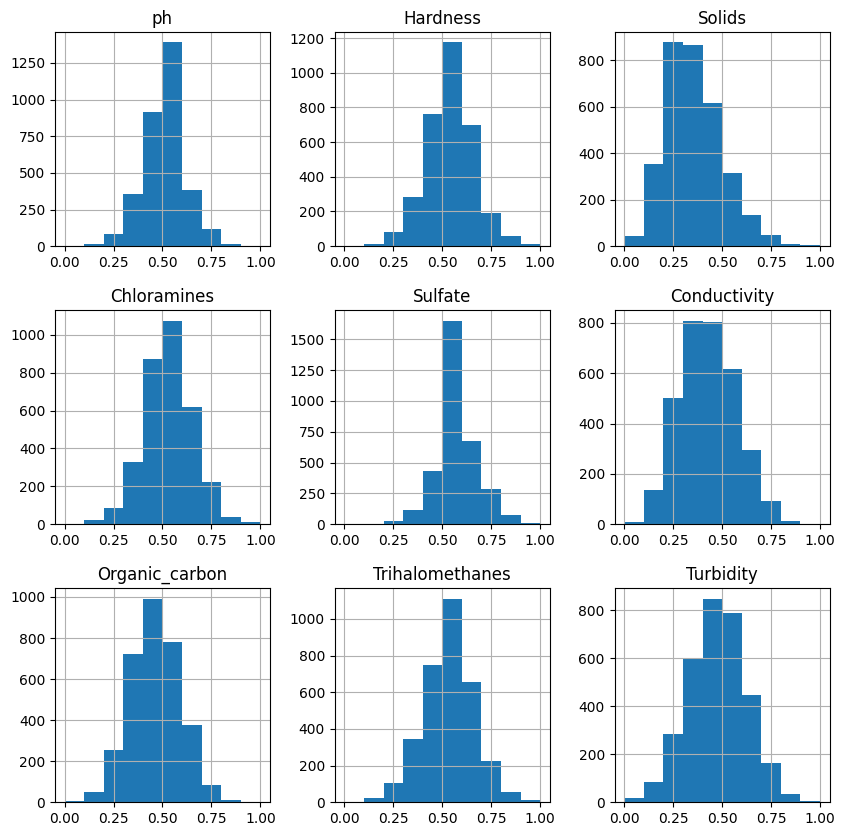

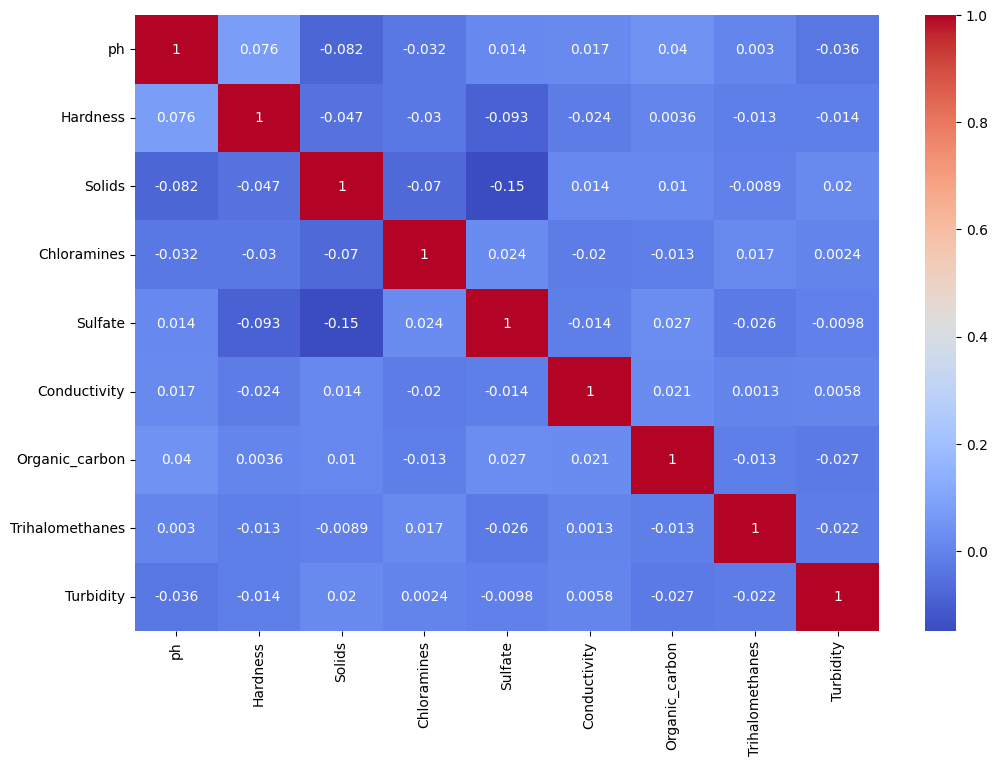

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of each feature
X.hist(figsize=(10, 10))
plt.show()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


#Building and Evaluating Machine Learning Models
We will start with some basic machine learning models.

Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

[[412   0]
 [244   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       412
         1.0       0.60      0.34      0.44       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.66      0.67      0.64       656

[[356  56]
 [160  84]]


#Support Vector Machine (SVM)
Training and Evaluating SVM

In [9]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))


SVM Classification Report
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

SVM Confusion Matrix
[[412   0]
 [244   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#K-Nearest Neighbors (KNN)
Training and Evaluating KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))


KNN Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       412
         1.0       0.53      0.40      0.46       244

    accuracy                           0.65       656
   macro avg       0.61      0.60      0.60       656
weighted avg       0.63      0.65      0.63       656

KNN Confusion Matrix
[[326  86]
 [146  98]]


#Gradient Boosting
Training and Evaluating Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classification Report
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       412
         1.0       0.59      0.26      0.36       244

    accuracy                           0.66       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.64      0.66      0.62       656

Gradient Boosting Confusion Matrix
[[369  43]
 [181  63]]


#Naive Bayes
Training and Evaluating Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75       412
         1.0       0.51      0.22      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.55      0.53       656
weighted avg       0.60      0.63      0.58       656

Naive Bayes Confusion Matrix
[[361  51]
 [191  53]]


#AdaBoost
Training and Evaluating AdaBoost

In [13]:
from sklearn.ensemble import AdaBoostClassifier

# Train an AdaBoost model
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)

# Make predictions
y_pred_ab = ab_model.predict(X_test)

# Evaluate the model
print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ab))
print("AdaBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ab))


AdaBoost Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.87      0.74       412
         1.0       0.47      0.19      0.27       244

    accuracy                           0.62       656
   macro avg       0.56      0.53      0.51       656
weighted avg       0.58      0.62      0.57       656

AdaBoost Confusion Matrix
[[360  52]
 [197  47]]


#XGBoost
Training and Evaluating XGBoost

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       412
         1.0       0.55      0.42      0.48       244

    accuracy                           0.66       656
   macro avg       0.62      0.61      0.61       656
weighted avg       0.64      0.66      0.64       656

XGBoost Confusion Matrix
[[327  85]
 [141 103]]


#Extra Trees Classifier
Training and Evaluating Extra Trees Classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

# Train an Extra Trees model
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)

# Make predictions
y_pred_et = et_model.predict(X_test)

# Evaluate the model
print("Extra Trees Classification Report")
print(classification_report(y_test, y_pred_et))
print("Extra Trees Confusion Matrix")
print(confusion_matrix(y_test, y_pred_et))


Extra Trees Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78       412
         1.0       0.66      0.34      0.45       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656

Extra Trees Confusion Matrix
[[368  44]
 [160  84]]


#LightGBM
Training and Evaluating LightGBM

In [16]:
import lightgbm as lgb

# Train a LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780
LightGBM Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       412
         1.0       0.58      0.40      0.48       244

    accuracy                           0.67       656
   macro avg       0.64      0.62      0.62       656
weighted avg       0.66      0.67      0.65       656

LightGBM Confusion Matrix
[[342  70]
 [146  98]]


#CatBoost
Training and Evaluating CatBoost

In [18]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [19]:
from catboost import CatBoostClassifier

# Train a CatBoost model
cb_model = CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)

# Make predictions
y_pred_cb = cb_model.predict(X_test)

# Evaluate the model
print("CatBoost Classification Report")
print(classification_report(y_test, y_pred_cb))
print("CatBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_cb))


CatBoost Classification Report
              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77       412
         1.0       0.62      0.35      0.45       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.61       656
weighted avg       0.67      0.68      0.65       656

CatBoost Confusion Matrix
[[359  53]
 [158  86]]


#Running the Comparative Analysis
Once all models are installed and evaluated, you can run the comparative analysis as described earlier:

In [20]:
from sklearn.metrics import accuracy_score

# Collecting accuracy for each model
models = {
    'Logistic Regression': model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Gradient Boosting': gb_model,
    'Naive Bayes': nb_model,
    'AdaBoost': ab_model,
    'XGBoost': xgb_model,
    'Extra Trees': et_model,
    'LightGBM': lgb_model,
    'CatBoost': cb_model  # Include CatBoost now
}

# Calculating accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.6280
Random Forest Accuracy: 0.6707
SVM Accuracy: 0.6280
KNN Accuracy: 0.6463
Gradient Boosting Accuracy: 0.6585
Naive Bayes Accuracy: 0.6311
AdaBoost Accuracy: 0.6204
XGBoost Accuracy: 0.6555
Extra Trees Accuracy: 0.6890
LightGBM Accuracy: 0.6707
CatBoost Accuracy: 0.6784


#Building and Evaluating Deep Learning Models
We will use TensorFlow/Keras to build a neural network.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a neural network model
nn_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/50
262/262 [==============================] - 4s 8ms/step - loss: 0.6740 - accuracy: 0.6069 - val_loss: 0.6606 - val_accuracy: 0.6280
Epoch 2/50
262/262 [==============================] - 2s 6ms/step - loss: 0.6719 - accuracy: 0.6053 - val_loss: 0.6608 - val_accuracy: 0.6280
Epoch 3/50
262/262 [==============================] - 1s 3ms/step - loss: 0.6704 - accuracy: 0.6053 - val_loss: 0.6619 - val_accuracy: 0.6280
Epoch 4/50
262/262 [==============================] - 1s 5ms/step - loss: 0.6702 - accuracy: 0.6053 - val_loss: 0.6575 - val_accuracy: 0.6280
Epoch 5/50
262/262 [==============================] - 1s 4ms/step - loss: 0.6688 - accuracy: 0.6053 - val_loss: 0.6563 - val_accuracy: 0.6280
Epoch 6/50
262/262 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 0.6084 - val_loss: 0.6548 - val_accuracy: 0.6326
Epoch 7/50
262/262 [==============================] - 1s 4ms/step - loss: 0.6647 - accuracy: 0.6073 - val_loss: 0.6565 - val_accuracy: 0.6402
Epoch 